<a href="https://colab.research.google.com/github/joshid43016/AnalyticsDataEcosystem/blob/main/Forecast_prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings; 
warnings.simplefilter('ignore')

In [2]:
!pip install pystan
!pip install fbprophet

In [3]:
import pandas as pd
from fbprophet import Prophet

In [5]:
df = pd.read_csv('/content/prophet.csv')
df['Year'] = df['Time Date'].apply(lambda x: str(x)[-4:])
df['Month'] = df['Time Date'].apply(lambda x: str(x)[-6:-4])
df['Day'] = df['Time Date'].apply(lambda x: str(x)[:-6])
df['ds'] = pd.DatetimeIndex(df['Year']+'-'+df['Month']+'-'+df['Day'])
df = df.loc[(df['Product']==2667437) & (df['Store']=='QLD_CW_ST0203')]
df.drop(['Time Date', 'Product', 'Store', 'Year', 'Month', 'Day'], axis=1, inplace=True)
df.columns = ['y', 'ds']
df.head()

,y,ds
0,2926.000,2018-01-01
1,2687.531,2018-01-02
2,2793.000,2018-01-03
3,2394.000,2018-01-04
4,2660.000,2018-01-05


In [6]:
m = Prophet(interval_width=0.95, daily_seasonality=True)
model = m.fit(df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [7]:
future = m.make_future_dataframe(periods=100,freq='D')
forecast = m.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-01-01,156.192919,1526.953150,3904.963718,156.192919,156.192919,2560.807384,2560.807384,2560.807384,2502.239681,2502.239681,2502.239681,58.567703,58.567703,58.567703,0.0,0.0,0.0,2717.000303
1,2018-01-02,160.355188,1185.475774,3479.472893,160.355188,160.355188,2232.348907,2232.348907,2232.348907,2502.239681,2502.239681,2502.239681,-269.890774,-269.890774,-269.890774,0.0,0.0,0.0,2392.704096
2,2018-01-03,164.517457,1058.404377,3545.578345,164.517457,164.517457,2224.122134,2224.122134,2224.122134,2502.239681,2502.239681,2502.239681,-278.117547,-278.117547,-278.117547,0.0,0.0,0.0,2388.639592
3,2018-01-04,168.679727,1527.107905,3978.014876,168.679727,168.679727,2612.761421,2612.761421,2612.761421,2502.239681,2502.239681,2502.239681,110.521740,110.521740,110.521740,0.0,0.0,0.0,2781.441147
4,2018-01-05,172.841996,1862.781108,4151.761855,172.841996,172.841996,2808.346855,2808.346855,2808.346855,2502.239681,2502.239681,2502.239681,306.107174,306.107174,306.107174,0.0,0.0,0.0,2981.188851


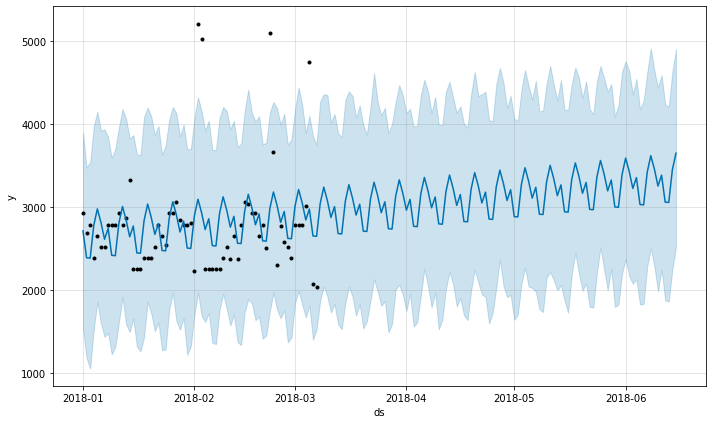

In [8]:
plot1 = m.plot(forecast)


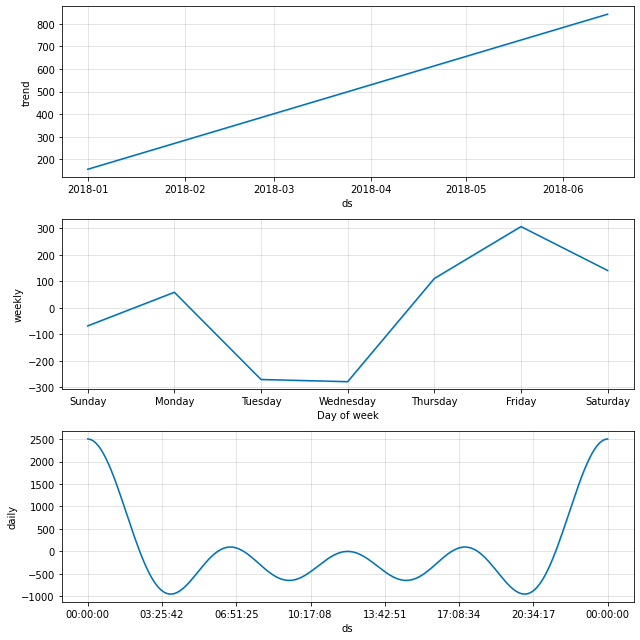

In [9]:
plt2 = m.plot_components(forecast)